<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Application Programming Interface, Natural Language Processing, & Classification Modelling

### Contents:
#### Part 3 (of 3)
- Executive Summary
- Problem Statement
- Background & Research
- Data Collection
- Data Wrangling
- Exploration & Visualisation
- [Pre-Processing & Modelling](#Pre-Processing-&-Modelling)
- [Results & Analysis](#Results-&-Analysis)
- [Recommendations & Conclusions](#Recommendations-&-Conclusions)
- [References](#References)

## Pre-Processing & Modelling

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

pd.set_option('display.max.columns', None)
pd.set_option('display.max.colwidth', 100)

### Import DataFrames

In [2]:
# import csv file as dataframe
p_btc = pd.read_csv('../data/btc_posts_clean.csv')

In [3]:
# check out first 5 rows
p_btc.head()

,subreddit,post_title,post_content
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...
1,Bitcoin,help starting crypto business,guys interested starting crypto business app that would take small amounts money f...
2,Bitcoin,did jack dorsey confirm deflect taking btc for advertising,might just being stupid but watching the conference there the moment elon asks dorsey about a...
3,Bitcoin,⚡ lightning thursday july 2021 explore the lightning network⚡,the lightning network secondlayer solution top the bitcoin blockchain that enables quick...
4,Bitcoin,will eth2 affect bitcoinbitcoin mining,was thinking buying mining rig with friend and said that ethereum will affect bitco...


In [4]:
# import csv file as dataframe
p_eth = pd.read_csv('../data/eth_posts_clean.csv')

In [5]:
# check out first 5 rows
p_eth.head()

,subreddit,post_title,post_content
0,ethereum,should sell bitcoin and just all ethereum,have like invested total bitcoin and after the crash only have gains sold 65k...
1,ethereum,will any blockchain able sustain low fees that can become useful for everyday transact...,the case that crypto currency whether eth ada algo dai etc were gain huge user base say ...
2,ethereum,ethereumdai lost need help,have idea how access the private key account for ethereum sent large sum dai ...
3,ethereum,ethereum reddit mods censoring the laurel the volunteer platform,the laurel platform for volunteers being built volunteers laurels are the first fungible ...
4,ethereum,best ethereum stickers for telegram,couldn find any cool ethereumvitalikrelated stickers for telegram decided make own stic...


### DataFrame Concatenation, Feature Combination

In [6]:
# concatenate bitcoin dataframe and ethereum dataframe
df = pd.concat([p_btc, p_eth])
df.reset_index(drop=True, inplace=True)

# combine post title column and post content column into a new column
df['title_content'] = df['post_title'] + ' ' + df['post_content']

# check out shape
print(df.shape)

(2707, 4)


In [7]:
# check out first 5 rows
df.head()

,subreddit,post_title,post_content,title_content
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...,what moves crypto market apart from the speculators would like know there anything that...
1,Bitcoin,help starting crypto business,guys interested starting crypto business app that would take small amounts money f...,help starting crypto business guys interested starting crypto business app that woul...
2,Bitcoin,did jack dorsey confirm deflect taking btc for advertising,might just being stupid but watching the conference there the moment elon asks dorsey about a...,did jack dorsey confirm deflect taking btc for advertising might just being stupid but wa...
3,Bitcoin,⚡ lightning thursday july 2021 explore the lightning network⚡,the lightning network secondlayer solution top the bitcoin blockchain that enables quick...,⚡ lightning thursday july 2021 explore the lightning network⚡ the lightning network second...
4,Bitcoin,will eth2 affect bitcoinbitcoin mining,was thinking buying mining rig with friend and said that ethereum will affect bitco...,will eth2 affect bitcoinbitcoin mining was thinking buying mining rig with friend and ...


In [8]:
# check out last 5 rows
df.tail()

,subreddit,post_title,post_content,title_content
2702,ethereum,gas fee will ruin this coin nothing done the next year,110 swap 150 eth usdt fix shit eth this fucking redonkk,gas fee will ruin this coin nothing done the next year 110 swap 150 eth usdt fix ...
2703,ethereum,ethereum only for the rich poor folks have any stake,looking gas fees ethereum feels like its only for rich first world crypto genius meanwhile poo...,ethereum only for the rich poor folks have any stake looking gas fees ethereum feels...
2704,ethereum,have been bitten the bug,when blockchain first came out thought would fad seeing that bitcoin really had purpos...,have been bitten the bug when blockchain first came out thought would fad seeing tha...
2705,ethereum,well this quite the story,fantastic for him and glad his roulette wheel paid off but doge the future crypto not sure...,well this quite the story fantastic for him and glad his roulette wheel paid off but doge ...
2706,ethereum,mining eth with phoenix miner latest getting high stale rate,hey everybody have 5600x with 580 and 32gigs ddr4 mining ethereum using phoenix mine ...,mining eth with phoenix miner latest getting high stale rate hey everybody have 5600x wit...


### Tokenization, Stopword Removal, Stemming, Lemmatization

In [9]:
# tokenization

def tokenize(text):
    return text.split()

df['title_content_tokenized'] = df['title_content'].apply(lambda x: tokenize(x.lower()))

# check out first row
df.head(1)

,subreddit,post_title,post_content,title_content,title_content_tokenized
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...,what moves crypto market apart from the speculators would like know there anything that...,"[what, moves, crypto, market, apart, from, the, speculators, would, like, know, there, anything,..."


In [10]:
# remove stop words

def remove_stop_words(tokens):
    return [word for word in tokens if word not in nltk.corpus.stopwords.words('english')]

df['title_content_nostopwords'] = df['title_content_tokenized'].apply(lambda x: remove_stop_words(x))

# check out first row
df.head(1)

,subreddit,post_title,post_content,title_content,title_content_tokenized,title_content_nostopwords
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...,what moves crypto market apart from the speculators would like know there anything that...,"[what, moves, crypto, market, apart, from, the, speculators, would, like, know, there, anything,...","[moves, crypto, market, apart, speculators, would, like, know, anything, moves, crypto, market, ..."


In [11]:
# stemming

ps = nltk.PorterStemmer()

def stemming(tokens):
    return ' '.join([ps.stem(word) for word in tokens])

df['title_content_stemmed'] = df['title_content_nostopwords'].apply(lambda x: stemming(x))

# check out first row
df.head(1)

,subreddit,post_title,post_content,title_content,title_content_tokenized,title_content_nostopwords,title_content_stemmed
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...,what moves crypto market apart from the speculators would like know there anything that...,"[what, moves, crypto, market, apart, from, the, speculators, would, like, know, there, anything,...","[moves, crypto, market, apart, speculators, would, like, know, anything, moves, crypto, market, ...",move crypto market apart specul would like know anyth move crypto market apart specul cryptocurr...


In [12]:
# lemmatization

wn = nltk.WordNetLemmatizer()

def lemmatization(tokens):
    return ' '.join([wn.lemmatize(word) for word in tokens])

df['title_content_lemmatized'] = df['title_content_nostopwords'].apply(lambda x: lemmatization(x))

# check out first row
df.head(1)

,subreddit,post_title,post_content,title_content,title_content_tokenized,title_content_nostopwords,title_content_stemmed,title_content_lemmatized
0,Bitcoin,what moves crypto market apart from the speculators,would like know there anything that moves crypto market apart from the speculators ...,what moves crypto market apart from the speculators would like know there anything that...,"[what, moves, crypto, market, apart, from, the, speculators, would, like, know, there, anything,...","[moves, crypto, market, apart, speculators, would, like, know, anything, moves, crypto, market, ...",move crypto market apart specul would like know anyth move crypto market apart specul cryptocurr...,move crypto market apart speculator would like know anything move crypto market apart speculator...


**Decision:** Choosing between using stemmed tokens and lemmatized tokens

In [13]:
df['title_content_stemmed'].head()

0    move crypto market apart specul would like know anyth move crypto market apart specul cryptocurr...
1    help start crypto busi guy interest start crypto busi app would take small amount money account ...
2    jack dorsey confirm deflect take btc advertis might stupid watch confer moment elon ask dorsey a...
3    ⚡ lightn thursday juli 2021 explor lightn network⚡ lightn network secondlay solut top bitcoin bl...
4    eth2 affect bitcoinbitcoin mine think buy mine rig friend said ethereum affect bitcoin affect ex...
Name: title_content_stemmed, dtype: object

In [14]:
df['title_content_lemmatized'].head()

0    move crypto market apart speculator would like know anything move crypto market apart speculator...
1    help starting crypto business guy interested starting crypto business app would take small amoun...
2    jack dorsey confirm deflect taking btc advertising might stupid watching conference moment elon ...
3    ⚡ lightning thursday july 2021 explore lightning network⚡ lightning network secondlayer solution...
4    eth2 affect bitcoinbitcoin mining thinking buying mining rig friend said ethereum affect bitcoin...
Name: title_content_lemmatized, dtype: object

**Verdict:** A glance at the first few samples of tokens after stemming/lemmatization shows that lemmatization has done a better job at reducing inflected words to their root form as compared to stemming (e.g. specul vs speculator). In favour of accuracy over speed, the lemmatized tokens will be chosen over the stemmed tokens for subsequent vectorization and modelling.

### Feature-Target Definition

In [15]:
# define feature
X = df['title_content_lemmatized'].copy()

# define target
y = df['subreddit'].copy()

In [16]:
# label encode target column
y = y.map({'Bitcoin': 1, 'ethereum': 0})

In [17]:
# show target class balance/imbalance
y.value_counts()

1    1557
0    1150
Name: subreddit, dtype: int64

### Train Test Split

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Vectorizer-Model Evaluation With Pipeline-GridSearchCV Duo

The vectorizer-model combinations that will be evaluated are given in the table below.

| No |  Transformer      |  Estimator               |
|:--:|:------------------|:-------------------------|
| 1  |  Count Vectorizer |  Multinomial Naive Bayes |
| 2  |  Tfidf Vectorizer |  Multinomial Naive Bayes |
| 3  |  Count Vectorizer |  K-Nearest Neighbours    |
| 4  |  Tfidf Vectorizer |  K-Nearest Neighbours    |
| 5  |  Count Vectorizer |  Logistic Regression     |
| 6  |  Tfidf Vectorizer |  Logistic Regression     |

The **2 vectorizers** considered here are Count Vectorizer and Tfidf Vectorizer. The **3 models** considered here are Multinomial Naive Bayes, K-Nearest Neighbours, and Logistic Regression. **6 combinations** were created in total. Each one will be evaluated to find the best performing combination.

---

The metrics that will be used to evaluate each combination are given in the list below.

**1. Cross Validation**
- Cross-Validated (CV) Accuracy
- Cross-Validated (CV) Receiver Operating Characteristic Area Under Curve (ROC AUC)

**2. Training Dataset**
- Training Accuracy
- Training Receiver Operating Characteristic Area Under Curve (ROC AUC)

**3. Testing Dataset**
- Testing Accuracy
- Testing Receiver Operating Characteristic Area Under Curve (ROC AUC)

Accuracy and ROC AUC were chosen as the metrics for evaluation because the interest here is in selecting a model that is best able to correctly classify a post as belonging to the bitcoin subreddit or the ethereum subreddit (i.e. focus is on maximising true positives and true negatives). Recall, precision, sensitivity, and specificity were not used because the importance of balancing between false positives or false negatives is not so crucial in this project (i.e. there is less emphasise on minimising false positives/false negatives bearing decreasing one increases the other).

In [19]:
# create pipelines

pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())])

pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())])

pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())])

pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())])

pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())])

pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())])

In [20]:
# define parameter grids

param_grid1 = {
    'cvec__max_features': [1000, 3000], 
    'cvec__min_df': [2], 
    'cvec__max_df': [0.9],
    'cvec__ngram_range': [(1, 1), (2, 2)]}

param_grid2 = {
    'tvec__max_features': [1000, 3000], 
    'tvec__min_df': [2], 
    'tvec__max_df': [0.9],
    'tvec__ngram_range': [(1, 1), (2, 2)]}

param_grid3 = {
    'cvec__max_features': [1000, 3000], 
    'cvec__min_df': [2], 
    'cvec__max_df': [0.9],
    'cvec__ngram_range': [(1, 1), (2, 2)], 
    'knn__n_neighbors': [3, 5, 7, 9], 
    'knn__weights': ['uniform', 'distance']}

param_grid4 = {
    'tvec__max_features': [1000, 3000], 
    'tvec__min_df': [2], 
    'tvec__max_df': [0.9],
    'tvec__ngram_range': [(1, 1), (2, 2)], 
    'knn__n_neighbors': [3, 5, 7, 9], 
    'knn__weights': ['uniform', 'distance']}

param_grid5 = {
    'cvec__max_features': [1000, 3000], 
    'cvec__min_df': [2], 
    'cvec__max_df': [0.9],
    'cvec__ngram_range': [(1, 1), (2, 2)], 
    'logreg__C': [0.1, 1, 10], 
    'logreg__solver': ['liblinear'], 
    'logreg__penalty': ['l2', 'l1'], 
    'logreg__max_iter': [10000]}

param_grid6 = {
    'tvec__max_features': [1000, 3000], 
    'tvec__min_df': [2], 
    'tvec__max_df': [0.9],
    'tvec__ngram_range': [(1, 1), (2, 2)], 
    'logreg__C': [0.1, 1, 10], 
    'logreg__solver': ['liblinear'],  
    'logreg__penalty': ['l2', 'l1'], 
    'logreg__max_iter': [10000]}

In [21]:
# instantiate gridsearchcvs

gs_cvec_mnb = GridSearchCV(pipe1, param_grid1, cv=3)
gs_tvec_mnb = GridSearchCV(pipe2, param_grid2, cv=3)

gs_cvec_knn = GridSearchCV(pipe3, param_grid3, cv=3)
gs_tvec_knn = GridSearchCV(pipe4, param_grid4, cv=3)

gs_cvec_logreg = GridSearchCV(pipe5, param_grid5, cv=3)
gs_tvec_logreg = GridSearchCV(pipe6, param_grid6, cv=3)

In [22]:
# get cross-validated accuracy scores

print('MULTINOMIAL NAIVE BAYES:')
print('Count Vectorizer-Multinomial Naive Bayes CV Accuracy:', 
      cross_val_score(gs_cvec_mnb, X_train, y_train, scoring='accuracy', cv=3).mean())
print('Tfidf Vectorizer-Multinomial Naive Bayes CV Accuracy:', 
      cross_val_score(gs_tvec_mnb, X_train, y_train, scoring='accuracy', cv=3).mean())

print()

print('K-NEAREST NEIGHBOURS:')
print('Count Vectorizer-K-Nearest Neighbours CV Accuracy:', 
      cross_val_score(gs_cvec_knn, X_train, y_train, scoring='accuracy', cv=3).mean())
print('Tfidf Vectorizer-K-Nearest Neighbours CV Accuracy:', 
      cross_val_score(gs_tvec_knn, X_train, y_train, scoring='accuracy', cv=3).mean())

print()

print('LOGISTIC REGRESSION:')
print('Count Vectorizer-Logistic Regression CV Accuracy:', 
      cross_val_score(gs_cvec_logreg, X_train, y_train, scoring='accuracy', cv=3).mean())
print('Tfidf Vectorizer-Logistic Regression CV Accuracy:', 
      cross_val_score(gs_tvec_logreg, X_train, y_train, scoring='accuracy', cv=3).mean())

MULTINOMIAL NAIVE BAYES:
Count Vectorizer-Multinomial Naive Bayes CV Accuracy: 0.852167713160411
Tfidf Vectorizer-Multinomial Naive Bayes CV Accuracy: 0.851643630430567

K-NEAREST NEIGHBOURS:
Count Vectorizer-K-Nearest Neighbours CV Accuracy: 0.7634706814580031
Tfidf Vectorizer-K-Nearest Neighbours CV Accuracy: 0.8030694363644875

LOGISTIC REGRESSION:
Count Vectorizer-Logistic Regression CV Accuracy: 0.8695894936040175
Tfidf Vectorizer-Logistic Regression CV Accuracy: 0.8690562164403164


In [23]:
# get cross-validated roc auc scores

print('MULTINOMIAL NAIVE BAYES:')
print('Count Vectorizer-Multinomial Naive Bayes CV ROC AUC:', 
      cross_val_score(gs_cvec_mnb, X_train, y_train, scoring='roc_auc', cv=3).mean())
print('Tfidf Vectorizer-Multinomial Naive Bayes CV ROC AUC:', 
      cross_val_score(gs_tvec_mnb, X_train, y_train, scoring='roc_auc', cv=3).mean())

print()

print('K-NEAREST NEIGHBOURS:')
print('Count Vectorizer-K-Nearest Neighbours CV ROC AUC:', 
      cross_val_score(gs_cvec_knn, X_train, y_train, scoring='roc_auc', cv=3).mean())
print('Tfidf Vectorizer-K-Nearest Neighbours CV ROC AUC:', 
      cross_val_score(gs_tvec_knn, X_train, y_train, scoring='roc_auc', cv=3).mean())

print()

print('LOGISTIC REGRESSION:')
print('Count Vectorizer-Logistic Regression CV ROC AUC:', 
      cross_val_score(gs_cvec_logreg, X_train, y_train, scoring='roc_auc', cv=3).mean())
print('Tfidf Vectorizer-Logistic Regression CV ROC AUC:', 
      cross_val_score(gs_tvec_logreg, X_train, y_train, scoring='roc_auc', cv=3).mean())

MULTINOMIAL NAIVE BAYES:
Count Vectorizer-Multinomial Naive Bayes CV ROC AUC: 0.9198324765819331
Tfidf Vectorizer-Multinomial Naive Bayes CV ROC AUC: 0.9252470837818852

K-NEAREST NEIGHBOURS:
Count Vectorizer-K-Nearest Neighbours CV ROC AUC: 0.8659986267929148
Tfidf Vectorizer-K-Nearest Neighbours CV ROC AUC: 0.8725555543327532

LOGISTIC REGRESSION:
Count Vectorizer-Logistic Regression CV ROC AUC: 0.9420477135454967


/Users/raytan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Tfidf Vectorizer-Logistic Regression CV ROC AUC: 0.9491093846160353


In [24]:
# fit gridsearchcvs on training data

gs_cvec_mnb = gs_cvec_mnb.fit(X_train, y_train)
gs_tvec_mnb = gs_tvec_mnb.fit(X_train, y_train)
gs_cvec_knn = gs_cvec_knn.fit(X_train, y_train)
gs_tvec_knn = gs_tvec_knn.fit(X_train, y_train)
gs_cvec_logreg = gs_cvec_logreg.fit(X_train, y_train)
gs_tvec_logreg = gs_tvec_logreg.fit(X_train, y_train)

In [25]:
# get best parameters from gridsearchcvs

print('MULTINOMIAL NAIVE BAYES:')
print('Count Vectorizer-Multinomial Naive Bayes Best Parameters: \n', gs_cvec_mnb.best_params_)
print('Tfidf Vectorizer-Multinomial Naive Bayes Best Parameters: \n', gs_tvec_mnb.best_params_)

print()

print('K-NEAREST NEIGHBOURS:')
print('Count Vectorizer-K-Nearest Neighbours Best Parameters: \n', gs_cvec_knn.best_params_)
print('Tfidf Vectorizer-K-Nearest Neighbours Best Parameters: \n', gs_tvec_knn.best_params_)

print()

print('LOGISTIC REGRESSION:')
print('Count Vectorizer-Logistic Regression Best Parameters: \n', gs_cvec_logreg.best_params_)
print('Tfidf Vectorizer-Logistic Regression Best Parameters: \n', gs_tvec_logreg.best_params_)

MULTINOMIAL NAIVE BAYES:
Count Vectorizer-Multinomial Naive Bayes Best Parameters: 
 {'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}
Tfidf Vectorizer-Multinomial Naive Bayes Best Parameters: 
 {'tvec__max_df': 0.9, 'tvec__max_features': 1000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1)}

K-NEAREST NEIGHBOURS:
Count Vectorizer-K-Nearest Neighbours Best Parameters: 
 {'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Tfidf Vectorizer-K-Nearest Neighbours Best Parameters: 
 {'knn__n_neighbors': 9, 'knn__weights': 'uniform', 'tvec__max_df': 0.9, 'tvec__max_features': 3000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1)}

LOGISTIC REGRESSION:
Count Vectorizer-Logistic Regression Best Parameters: 
 {'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'logreg__C': 0.1, 'logreg__max_iter': 10000, 'logr

In [26]:
# get accuracy scores on training data

print('MULTINOMIAL NAIVE BAYES:')
print('Count Vectorizer-Multinomial Naive Bayes Training Accuracy:', gs_cvec_mnb.score(X_train, y_train))
print('Tfidf Vectorizer-Multinomial Naive Bayes Training Accuracy:', gs_tvec_mnb.score(X_train, y_train))

print()

print('K-NEAREST NEIGHBOURS:')
print('Count Vectorizer-K-Nearest Neighbours Training Accuracy:', gs_cvec_knn.score(X_train, y_train))
print('Tfidf Vectorizer-K-Nearest Neighbours Training Accuracy:', gs_tvec_knn.score(X_train, y_train))

print()

print('LOGISTIC REGRESSION:')
print('Count Vectorizer-Logistic Regression Training Accuracy:', gs_cvec_logreg.score(X_train, y_train))
print('Tfidf Vectorizer-Logistic Regression Training Accuracy:', gs_tvec_logreg.score(X_train, y_train))

MULTINOMIAL NAIVE BAYES:
Count Vectorizer-Multinomial Naive Bayes Training Accuracy: 0.9234424498416051
Tfidf Vectorizer-Multinomial Naive Bayes Training Accuracy: 0.8928194297782471

K-NEAREST NEIGHBOURS:
Count Vectorizer-K-Nearest Neighbours Training Accuracy: 0.8542766631467793
Tfidf Vectorizer-K-Nearest Neighbours Training Accuracy: 0.8579725448785639

LOGISTIC REGRESSION:
Count Vectorizer-Logistic Regression Training Accuracy: 0.9714889123548046
Tfidf Vectorizer-Logistic Regression Training Accuracy: 0.9392819429778247


In [27]:
# get roc auc scores on training data

print('MULTINOMIAL NAIVE BAYES:')
predicted_prob_y_train = gs_cvec_mnb.predict_proba(X_train)
print('Count Vectorizer-Multinomial Naive Bayes Training ROC AUC:', 
      metrics.roc_auc_score(y_train, predicted_prob_y_train[:, 1]))
predicted_prob_y_train = gs_tvec_mnb.predict_proba(X_train)
print('Tfidf Vectorizer-Multinomial Naive Bayes Training ROC AUC:', 
      metrics.roc_auc_score(y_train, predicted_prob_y_train[:, 1]))

print()

print('K-NEAREST NEIGHBOURS:')
predicted_prob_y_train = gs_cvec_knn.predict_proba(X_train)
print('Count Vectorizer-K-Nearest Neighbours Training ROC AUC:', 
      metrics.roc_auc_score(y_train, predicted_prob_y_train[:, 1]))
predicted_prob_y_train = gs_tvec_knn.predict_proba(X_train)
print('Tfidf Vectorizer-K-Nearest Neighbours Training ROC AUC:', 
      metrics.roc_auc_score(y_train, predicted_prob_y_train[:, 1]))

print()

print('LOGISTIC REGRESSION:')
predicted_prob_y_train = gs_cvec_logreg.predict_proba(X_train)
print('Count Vectorizer-Logistic Regression Training ROC AUC:', 
      metrics.roc_auc_score(y_train, predicted_prob_y_train[:, 1]))
predicted_prob_y_train = gs_tvec_logreg.predict_proba(X_train)
print('Tfidf Vectorizer-Logistic Regression Training ROC AUC:', 
      metrics.roc_auc_score(y_train, predicted_prob_y_train[:, 1]))

MULTINOMIAL NAIVE BAYES:
Count Vectorizer-Multinomial Naive Bayes Training ROC AUC: 0.9774903182017808
Tfidf Vectorizer-Multinomial Naive Bayes Training ROC AUC: 0.9641405586069618

K-NEAREST NEIGHBOURS:
Count Vectorizer-K-Nearest Neighbours Training ROC AUC: 0.9310017167724678
Tfidf Vectorizer-K-Nearest Neighbours Training ROC AUC: 0.9333538661601903

LOGISTIC REGRESSION:
Count Vectorizer-Logistic Regression Training ROC AUC: 0.997043272932601
Tfidf Vectorizer-Logistic Regression Training ROC AUC: 0.9859601092802674


In [28]:
# get accuracy scores on testing data

print('MULTINOMIAL NAIVE BAYES:')
print('Count Vectorizer-Multinomial Naive Bayes Testing Accuracy:', gs_cvec_mnb.score(X_test, y_test))
print('Tfidf Vectorizer-Multinomial Naive Bayes Testing Accuracy:', gs_tvec_mnb.score(X_test, y_test))

print()

print('K-NEAREST NEIGHBOURS:')
print('Count Vectorizer-K-Nearest Neighbours Testing Accuracy:', gs_cvec_knn.score(X_test, y_test))
print('Tfidf Vectorizer-K-Nearest Neighbours Testing Accuracy:', gs_tvec_knn.score(X_test, y_test))

print()

print('LOGISTIC REGRESSION:')
print('Count Vectorizer-Logistic Regression Testing Accuracy:', gs_cvec_logreg.score(X_test, y_test))
print('Tfidf Vectorizer-Logistic Regression Testing Accuracy:', gs_tvec_logreg.score(X_test, y_test))

MULTINOMIAL NAIVE BAYES:
Count Vectorizer-Multinomial Naive Bayes Testing Accuracy: 0.8597785977859779
Tfidf Vectorizer-Multinomial Naive Bayes Testing Accuracy: 0.8450184501845018

K-NEAREST NEIGHBOURS:
Count Vectorizer-K-Nearest Neighbours Testing Accuracy: 0.7761377613776138
Tfidf Vectorizer-K-Nearest Neighbours Testing Accuracy: 0.8081180811808119

LOGISTIC REGRESSION:
Count Vectorizer-Logistic Regression Testing Accuracy: 0.8819188191881919
Tfidf Vectorizer-Logistic Regression Testing Accuracy: 0.8843788437884379


In [29]:
# get roc auc scores on testing data

print('MULTINOMIAL NAIVE BAYES:')
predicted_prob_y_test = gs_cvec_mnb.predict_proba(X_test)
print('Count Vectorizer-Multinomial Naive Bayes Testing ROC AUC:', 
      metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))
predicted_prob_y_test = gs_tvec_mnb.predict_proba(X_test)
print('Tfidf Vectorizer-Multinomial Naive Bayes Testing ROC AUC:', 
      metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))

print()

print('K-NEAREST NEIGHBOURS:')
predicted_prob_y_test = gs_cvec_knn.predict_proba(X_test)
print('Count Vectorizer-K-Nearest Neighbours Testing ROC AUC:', 
      metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))
predicted_prob_y_test = gs_tvec_knn.predict_proba(X_test)
print('Tfidf Vectorizer-K-Nearest Neighbours Testing ROC AUC:', 
      metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))

print()

print('LOGISTIC REGRESSION:')
predicted_prob_y_test = gs_cvec_logreg.predict_proba(X_test)
print('Count Vectorizer-Logistic Regression Testing ROC AUC:', 
      metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))
predicted_prob_y_test = gs_tvec_logreg.predict_proba(X_test)
print('Tfidf Vectorizer-Logistic Regression Testing ROC AUC:', 
      metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))

MULTINOMIAL NAIVE BAYES:
Count Vectorizer-Multinomial Naive Bayes Testing ROC AUC: 0.9200730831165613
Tfidf Vectorizer-Multinomial Naive Bayes Testing ROC AUC: 0.9274185556794254

K-NEAREST NEIGHBOURS:
Count Vectorizer-K-Nearest Neighbours Testing ROC AUC: 0.8603616994921343
Tfidf Vectorizer-K-Nearest Neighbours Testing ROC AUC: 0.8765545645980428

LOGISTIC REGRESSION:
Count Vectorizer-Logistic Regression Testing ROC AUC: 0.9447541186671621
Tfidf Vectorizer-Logistic Regression Testing ROC AUC: 0.9500185804533631


### Vectorizer-Model Selection

**Decision:** Choosing the best vectorizer-model based on accuracy and ROC AUC...

>Accuracy is a metric that ranges from 0 to 1. The closer it is to 1, the better. <br>It measures how many correct predictions the model made out of all the data points.

> ROC AUC is a metric that ranges from 0.5 to 1. The closer it is to 1, the better. <br>It quantifies how well separated the underlying prediction distributions made by the model are.

**Verdict:** 

| No | Transformer | Estimator | CV Accuracy | CV ROC AUC | Training Accuracy | Testing Accuracy | Accuracy Difference | Training ROC AUC | Testing ROC AUC | ROC AUC Difference |
|:---:|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|
| 1 | Count Vectorizer | Multinomial Naive Bayes | 0.852 | 0.919 | 0.923 | 0.859 | 0.064 | 0.977 | 0.920 | 0.057 |
| 2 | Tfidf Vectorizer | Multinomial Naive Bayes | 0.851 | 0.925 | 0.892 | 0.845 | 0.047 | 0.964 | 0.927 | 0.037 |
| 3 | Count Vectorizer | K-Nearest Neighbours | 0.763 | 0.865 | 0.854 | 0.845 | 0.009 | 0.931 | 0.860 | 0.071 |
| 4 | Tfidf Vectorizer | K-Nearest Neighbours | 0.803 | 0.872 | 0.857 | 0.808 | 0.049 | 0.933 | 0.876 | 0.057 |
| 5 | Count Vectorizer | Logistic Regression | 0.869 | 0.942 | 0.971 | 0.881 | 0.090 | 0.997 | 0.944 | 0.053 |
| 6 | Tfidf Vectorizer | Logistic Regression | 0.869 | 0.949 | 0.939 | 0.884 | 0.055 | 0.985 | 0.950 | 0.035 |

Among the 6 vectorizer-model combinations, the Tfidf Vectorizer-Logistic Regression performed the best. It produced the highest cross-validated accuracy (0.869) and cross-validated receiver operating characteristic area under curve (0.949). It also scored, on testing data, the highest accuracy (0.884) and receiver operating characteristic area under curve (0.950). In terms of the training-testing accuracy difference, it only managed 4th with a difference of 0.055 (i.e. its difference was the 4th smallest). However, in terms of the training-testing receiver operating characteristic area under curve difference, it emerged top with a difference of 0.035 (i.e. its difference was the smallest).

In [30]:
# chosen vectorizer-model
gs_tvec_logreg.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2)),
                ('logreg',
                 LogisticRegression(C=1, max_iter=10000, solver='liblinear'))])

In [31]:
# make predictions on testing data
predicted_prob_y_test = gs_tvec_logreg.predict_proba(X_test)
predicted_y_test = gs_tvec_logreg.predict(X_test)

In [32]:
# print accuracy score
print('Accuracy Score:', metrics.accuracy_score(y_test, predicted_y_test))

Accuracy Score: 0.8843788437884379


In [33]:
# print classification report
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       345
           1       0.86      0.96      0.91       468

    accuracy                           0.88       813
   macro avg       0.89      0.87      0.88       813
weighted avg       0.89      0.88      0.88       813



In [34]:
# print confusion matrix
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predicted_y_test))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted_y_test).ravel()
print()
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)
print('True Positives:', tp)

Confusion Matrix:
[[271  74]
 [ 20 448]]

True Negatives: 271
False Positives: 74
False Negatives: 20
True Positives: 448


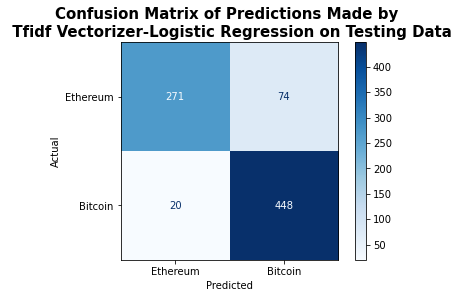

In [35]:
# plot confusion matrix
metrics.plot_confusion_matrix(gs_tvec_logreg.best_estimator_, X_test, y_test, 
                              cmap='Blues', values_format='d', display_labels=['Ethereum', 'Bitcoin']);

plt.title('Confusion Matrix of Predictions Made by \n Tfidf Vectorizer-Logistic Regression on Testing Data', 
          fontweight='bold', fontsize=15);
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [36]:
# # plot confusion matrix
# cm = metrics.confusion_matrix(y_test, predicted_y_test)

# modified_cm = []
# for index,value in enumerate(cm):
#     if index == 0:
#         modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
#     if index == 1:
#         modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])
        
# plt.figure(figsize=(10, 10))
# sns.heatmap(cm, annot=np.array(modified_cm), fmt='',
#             annot_kws={'size': 20}, linewidths=0.5,
#             square=True, cmap='Blues', 
#             xticklabels = ['Ethereum', 'Bitcoin'],
#             yticklabels = ['Ethereum', 'Bitcoin']);

# plt.title('Confusion Matrix of Predictions Made by \n Tfidf Vectorizer-Logistic Regression on Testing Data', 
#           fontweight='bold', fontsize=15);
# plt.ylabel('Actual', fontsize = 15);
# plt.xlabel('Predicted', fontsize = 15);
# plt.tick_params(labelsize= 15);

In [37]:
# print roc auc score
print('ROC AUC Score:', metrics.roc_auc_score(y_test, predicted_prob_y_test[:, 1]))

ROC AUC Score: 0.9500185804533631


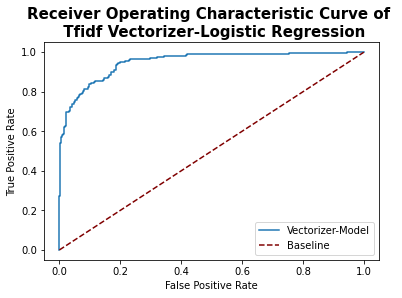

In [38]:
# plot roc curve
metrics.plot_roc_curve(gs_tvec_logreg.best_estimator_, X_test, y_test, label='Vectorizer-Model');
plt.plot([0, 1], [0, 1], label='Baseline', linestyle='--', color='maroon');

plt.title('Receiver Operating Characteristic Curve of \n Tfidf Vectorizer-Logistic Regression', 
          fontweight='bold', fontsize=15);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');
plt.legend();

In [39]:
# print intercept (of the logistic regression model)
print('Intercept:', gs_tvec_logreg.best_estimator_.named_steps['logreg'].intercept_[0])

Intercept: 0.47762607127361884


In [40]:
# get feature names (from the tfidf vectorizer)
name = gs_tvec_logreg.best_estimator_.named_steps['tvec'].get_feature_names()

In [41]:
# get and print coefficients (of the logistic regression model)
coef = gs_tvec_logreg.best_estimator_.named_steps['logreg'].coef_.reshape(-1)
print('Log Odds Of Post Being Bitcoin Over Ethereum:', coef[:5])

Log Odds Of Post Being Bitcoin Over Ethereum: [ 0.27727516  0.45762615  0.11658962 -0.17537962  0.08613302]


In [42]:
# print exponentiated coefficients (of the logistic regression model)
print('Odds Of Post Being Bitcoin Over Ethereum:', np.exp(coef[:5]))

Odds Of Post Being Bitcoin Over Ethereum: [1.31952941 1.5803181  1.12365821 0.83913841 1.0899513 ]


In [43]:
# show the top 15 features that predict bitcoin (which was assigned 1 in the target column)
coef_btc = pd.DataFrame({'Feature': name, 'Coefficients': coef}).sort_values('Coefficients', ascending=False).head(15)
coef_btc

,Feature,Coefficients
103,bitcoin,7.533891
114,btc,4.161946
499,lightning,1.520134
104,bitcoins,1.418579
749,sat,1.291895
994,year,1.183905
79,bank,0.951190
493,legit,0.895827
746,said,0.884743
118,bull,0.875664


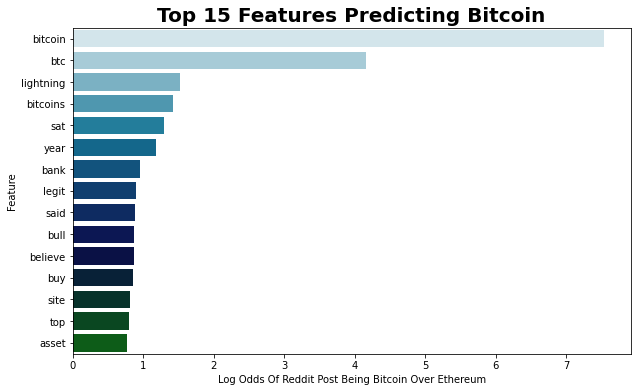

In [44]:
# visualise the top 15 features that predict bitcoin
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_btc, x='Coefficients', y='Feature', palette='ocean_r')
plt.title('Top 15 Features Predicting Bitcoin', fontweight='bold', fontsize=20)
plt.xlabel('Log Odds Of Reddit Post Being Bitcoin Over Ethereum');

# pd.Series(coef_btc['Coefficients'].values, index=coef_btc['Feature'].values) \
# .sort_values(ascending=True).plot.barh(figsize=(10, 10));

In [45]:
# show the top 15 features that predict bitcoin (which was assigned 1 in the target column)
odds_btc = pd.DataFrame({'Feature': name, 'Odds': np.exp(coef)}).sort_values('Odds', ascending=False).head(15)
odds_btc

,Feature,Odds
103,bitcoin,1870.368438
114,btc,64.196314
499,lightning,4.572836
104,bitcoins,4.131245
749,sat,3.639676
994,year,3.267107
79,bank,2.588787
493,legit,2.449361
746,said,2.422361
118,bull,2.400468


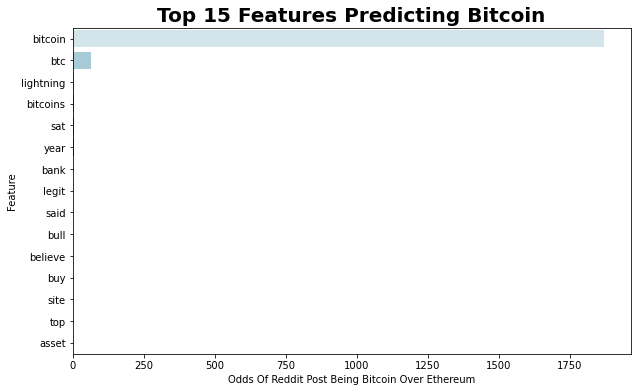

In [46]:
# visualise the top 15 features that predict bitcoin
plt.figure(figsize=(10, 6))
sns.barplot(data=odds_btc, x='Odds', y='Feature', palette='ocean_r')
plt.title('Top 15 Features Predicting Bitcoin', fontweight='bold', fontsize=20)
plt.xlabel('Odds Of Reddit Post Being Bitcoin Over Ethereum');

# pd.Series(odds_btc['Odds'].values, index=odds_btc['Feature'].values) \
# .sort_values(ascending=True).plot.barh(figsize=(10, 10));

**Interpretation:** Without surprise, 'bitcoin' and 'btc' are the top 2 predictors of a post belonging to the bitcoin subreddit. Based on subject domain knowledge, most of the words here do not appear to be strongly associated with bitcoin, with the exception of 'lightning' which has to do with the 'Lightning Network', a layer 2 payment protocol that is facing imminent implementation as an additional layer on top of bitcoin's current blockchain protocol.

In [47]:
# show the top 15 features that predict ethereum (which was assigned 0 in the target column)
coef_eth = pd.DataFrame({'Feature': name, 'Coefficients': coef}).sort_values('Coefficients', ascending=True).head(15)
coef_eth

,Feature,Coefficients
287,ethereum,-7.362979
284,eth,-6.884825
360,gas,-2.323924
652,poll,-2.270190
286,ether,-2.052778
822,staking,-1.899331
951,view,-1.772622
888,token,-1.653515
188,contract,-1.636769
228,defi,-1.612170


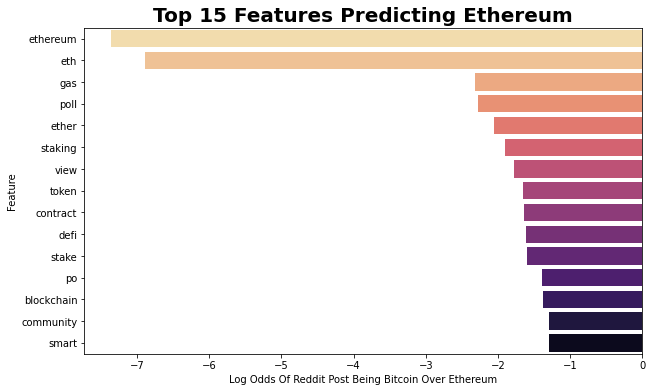

In [48]:
# visualise the top 15 features that predict ethereum
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_eth, x='Coefficients', y='Feature', palette='magma_r')
plt.title('Top 15 Features Predicting Ethereum', fontweight='bold', fontsize=20)
plt.xlabel('Log Odds Of Reddit Post Being Bitcoin Over Ethereum');

# pd.Series(coef_eth['Coefficients'].values, index=coef_eth['Feature'].values) \
# .sort_values(ascending=False).plot.barh(figsize=(10, 10));

In [49]:
# show the top 15 features that predict ethereum (which was assigned 0 in the target column)
odds_eth = pd.DataFrame({'Feature': name, 'Odds': np.exp(coef)}).sort_values('Odds', ascending=True).head(15)
odds_eth

,Feature,Odds
287,ethereum,0.000634
284,eth,0.001023
360,gas,0.097889
652,poll,0.103293
286,ether,0.128378
822,staking,0.149669
951,view,0.169887
888,token,0.191376
188,contract,0.194608
228,defi,0.199454


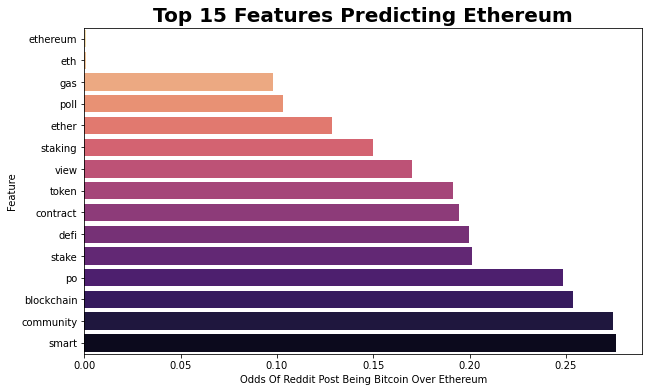

In [50]:
# visualise the top 15 features that predict ethereum
plt.figure(figsize=(10, 6))
sns.barplot(data=odds_eth, x='Odds', y='Feature', palette='magma_r')
plt.title('Top 15 Features Predicting Ethereum', fontweight='bold', fontsize=20)
plt.xlabel('Odds Of Reddit Post Being Bitcoin Over Ethereum');

# pd.Series(odds_eth['Odds'].values, index=odds_eth['Feature'].values) \
# .sort_values(ascending=False).plot.barh(figsize=(10, 10));

**Interpretation:** Without surprise, 'ethereum' and 'eth' are the top 2 predictors of a post belonging to the ethereum subreddit. Drawing upon subject domain knowledge, the following predictors - 'gas', 'ether', 'staking', 'token', 'defi', 'smart', 'contract' - are terminologies that are specific to ethereum's technology and applications. They refer to different aspects of what goes on under the hood in ethereum's blockchain protocol as well as ethereum's use cases.

In [51]:
# # if gs_tvec_mnb was the chosen vectorizer-model
# # let us explore how to get the top features

In [52]:
# # chosen vectorizer-model
# gs_tvec_mnb.best_estimator_

In [53]:
# # get feature names (from the tfidf vectorizer)
# name = gs_tvec_mnb.best_estimator_.named_steps['tvec'].get_feature_names()

In [54]:
# # get and print log probabilities of features for bitcoin (from the multinomial naive bayes model)
# bitcoin = gs_tvec_mnb.best_estimator_.named_steps['mnb'].feature_log_prob_[1]
# print('Log Probabilities Of Features For Bitcoin:', bitcoin[:5])

In [55]:
# # print probabilities
# print('Probabilities Of Features For Bitcoin:', np.exp(bitcoin[:5]))

In [56]:
# # get and print log probabilities of features for ethereum (from the multinomial naive bayes model)
# ethereum = gs_tvec_mnb.best_estimator_.named_steps['mnb'].feature_log_prob_[0]
# print('Log Probabilities Of Features For Ethereum:', ethereum[:5])

In [57]:
# # print probabilities
# print('Probabilities Of Features For Ethereum:', np.exp(ethereum[:5]))

In [58]:
# # show the top 15 features that predict bitcoin (which was assigned 1 in the target column)
# bitcoin_coef = pd.DataFrame({'Feature': name, 'Coefficients': bitcoin}).sort_values(
#     'Coefficients', ascending=False).head(15)
# bitcoin_coef

In [59]:
# # visualise the top 15 features that predict bitcoin
# plt.figure(figsize=(10, 6))
# sns.barplot(data=bitcoin_coef, x='Coefficients', y='Feature', palette='ocean_r')
# plt.title('Top 15 Features Predicting Bitcoin', fontweight='bold', fontsize=20)
# plt.xlabel('Log Probability of Reddit Post Being Bitcoin');

# # pd.Series(bitcoin_coef['Coefficients'].values, index=bitcoin_coef['Feature'].values) \
# # .sort_values(ascending=True).plot.barh(figsize=(10, 10));

In [60]:
# # show the top 15 features that predict bitcoin (which was assigned 1 in the target column)
# bitcoin_probs = pd.DataFrame({'Feature': name, 'Probabilities': np.exp(bitcoin)}).sort_values(
#     'Probabilities', ascending=False).head(15)
# bitcoin_probs

In [61]:
# # visualise the top 15 features that predict bitcoin
# plt.figure(figsize=(10, 6))
# sns.barplot(data=bitcoin_probs, x='Probabilities', y='Feature', palette='ocean_r')
# plt.title('Top 15 Features Predicting Bitcoin', fontweight='bold', fontsize=20)
# plt.xlabel('Probability of Reddit Post Being Bitcoin');

# # pd.Series(bitcoin_probs['Probabilities'].values, index=bitcoin_probs['Feature'].values) \
# # .sort_values(ascending=True).plot.barh(figsize=(10, 10));

In [62]:
# # show the top 15 features that predict ethereum (which was assigned 0 in the target column)
# ethereum_coef = pd.DataFrame({'Feature': name, 'Coefficients': ethereum}).sort_values(
#     'Coefficients', ascending=False).head(15)
# ethereum_coef

In [63]:
# # visualise the top 15 features that predict ethereum
# plt.figure(figsize=(10, 6))
# sns.barplot(data=ethereum_coef, x='Coefficients', y='Feature', palette='magma_r')
# plt.title('Top 15 Features Predicting Ethereum', fontweight='bold', fontsize=20)
# plt.xlabel('Log Probability of Reddit Post Being Ethereum');

# # pd.Series(ethereum_coef['Coefficients'].values, index=ethereum_coef['Feature'].values) \
# # .sort_values(ascending=True).plot.barh(figsize=(10, 10));

In [64]:
# # show the top 15 features that predict ethereum (which was assigned 0 in the target column)
# ethereum_probs = pd.DataFrame({'Feature': name, 'Probabilities': np.exp(ethereum)}).sort_values(
#     'Probabilities', ascending=False).head(15)
# ethereum_probs

In [65]:
# # visualise the top 15 features that predict ethereum
# plt.figure(figsize=(10, 6))
# sns.barplot(data=ethereum_probs, x='Probabilities', y='Feature', palette='magma_r')
# plt.title('Top 15 Features Predicting Ethereum', fontweight='bold', fontsize=20)
# plt.xlabel('Probability of Reddit Post Being Ethereum');

# # pd.Series(ethereum_probs['Probabilities'].values, index=ethereum_probs['Feature'].values) \
# # .sort_values(ascending=True).plot.barh(figsize=(10, 10));

### Null Model

In [66]:
# get baseline accuracy
y.value_counts(normalize=True)

1    0.575175
0    0.424825
Name: subreddit, dtype: float64

**Interpretation:** The baseline accuracy of the null model at predicting a reddit post to be from the bitcoin subreddit is 0.575. This is poorer than the Tfidf Vectorizer-Logistic Regression which was able to get a testing accuracy of 0.884. Hence, the Tfidf Vectorizer-Logistic Regression has managed to outperform the null model by an accuracy margin of 0.309.

In [67]:
# get baseline roc auc
y_mean_arr = np.full(y.shape, y.mean())
metrics.roc_auc_score(y, y_mean_arr)

0.5

**Interpretation:** The baseline ROC AUC of the null model is 0.50. This is poorer than the Tfidf Vectorizer-Logistic Regression which was able to get a testing ROC AUC of 0.95. Hence, the Tfidf Vectorizer-Logistic Regression has managed to outperform the null model by a ROC AUC margin of 0.45.

## Results & Analysis

A total of 6 vectorizer-model combinations were evaluated. The vectorizers considered were Count Vectorizer and Tfidf Vectorizer. The models considered were Multinomial Naive Bayes, K-Nearest Neighbours, and Logistic Regression. Each combination was placed in a pipeline and then passed into a grid search cv to find the optimal collection of hyperparameters. Evaluation of the combinations was conducted using 2 metrics: accuracy and receiver operating characteristic area under curve.

First, cross validation was done on the training dataset for all 6 combinations. Logistic Regression performed the best, followed by Multinomial Naïve Bayes, and then K-Nearest Neighbours. There is no clear winner between a Count-Vectorized model and a Tfidf-Vectorized model.

Next, all 6 combinations were fitted on the training dataset. After grid search cv had found for them the best set of hyperparameters, their performance scores on the training and testing datasets were determined. On both datasets, Logistic Regression was once again the best performer, followed by Multinomial Naïve Bayes, and then K-Nearest Neighbours. However, when the difference between the training and testing accuracy was calculated, K-Nearest Neighbour had the smallest difference, followed by Multinomial Naïve Bayes, and then Logistic Regression. Conversely, the difference between the training and testing receiver operating characteristic area under curve was smallest for Logistic Regression, followed by Multinomial Naïve Bayes, and then K-Nearest Neighbours. There is no clear distinction in performance between a Count-Vectorized model and a Tfidf-Vectorized model on the training and testing datasets.

All in all, Tfidf Vectorizer-Logistic Regression is the combination of choice as it performed the best generally across all the measures of performance. Just on the testing dataset alone, it scored the highest accuracy (0.884) and cross-validated receiver operating characteristic area under curve (0.950).

The top 3 words that predicted a post to be from the Bitcoin subreddit were ‘bitcoin’, ‘btc’, and ‘lightning’. The word ‘bitcoin’ alone had a log odds of 7.53 (i.e. an increase in the word count of ‘bitcoin’ by 1 in the post makes it 1863 times as likely for the post to be from the Bitcoin subreddit than the Ethereum subreddit). This is followed by ‘btc’ which had a log odds of 4.16 (64 times) and ‘lightning’ which had a log odds of 1.52 (4 times). The top 3 words that predicted a post to be from the Ethereum subreddit were ‘ethereum’, ‘eth’, and ‘gas’. The word ‘ethereum’ alone had a log odds of -7.36 (i.e. an increase in the word count of ‘ethereum’ by 1 in the post makes it 6.36e-5 times as likely for the post to be from the Bitcoin subreddit than the Ethereum subreddit). This is followed by ‘eth’ which had a log odds of -6.88 (1.02e-3 times) and ‘gas’ which had a log odds of -2.32 (9.82e-2 times).

## Recommendations & Conclusions

With the top words that the natural language processing classifier has found for each subreddit, a minimum viable product (i.e. a pilot version of the chatbot) can be designed. In its implementation, this chatbot will pick up on the keywords in a user-submitted message and try to identify whether the query pertains to Bitcoin or Ethereum. It will then give a suitable answer or route the message to the right customer service representative for further management.

Outside of the classifier’s ability to be used in the design of a chatbot, the results from this project can also be applied to other domains of cryptocurrency such as in tagging published articles, making search recommendations, auto-correcting or auto-completing terminologies and jargons, and measuring market sentiments of the two coins.

In conclusion, a natural language processing classifier could be trained to accurately distinguish posts from the subreddits of two cryptocurrencies (Bitcoin and Ethereum) that have been chosen for this project. Moving forward, the machine learning could be expanded to include other cryptocurrencies so that organisations will be able to extend support to other coins or tokens and provide a better customer experience. So far, only text data has been analysed. In future, there might also be value in analysing other forms of unstructured data that are not text-based (e.g. pictures, videos, audios) which may also convey powerful predictive clues during a classification task.

## References

https://www.investopedia.com/terms/c/cryptocurrency.asp<br>
https://www.nerdwallet.com/article/investing/cryptocurrency-7-things-to-know<br>
https://bernardmarr.com/what-is-the-difference-between-bitcoin-and-ethereum/<br>
https://www.reuters.com/article/us-crypto-currencies-flows-idUSKBN28V2OE<br>
https://www.oecd.org/financial/education/consumer-insights-survey-on-cryptoassets.pdf<br>
https://www.bloomberg.com/news/articles/2021-05-09/bitcoin-and-ethereum-how-are-they-different-quicktake